In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install --user researchpy

In [3]:
import researchpy # for t-test stuff! 

In [4]:
df = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_ABS.csv') 

In [5]:
df.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1997-01-31 00:00:00,0.042424,#VALUE!,#VALUE!,0.492825,0.592149,0.576450,0.738316,0.411216,0.554485,0.367785,0.483998,0.296604,0.406063,0.181587,0.370326,0.323947,0.773659,4
1,1997-02-28 00:00:00,0.030303,#VALUE!,#VALUE!,0.578927,0.558017,0.514660,0.624385,0.395695,0.415181,0.289185,0.404881,0.278218,0.374875,0.161709,0.338374,0.319785,0.783264,4
2,1997-03-31 00:00:00,0.000000,#VALUE!,#VALUE!,0.580438,0.872439,0.375946,0.569335,0.390152,0.488696,0.212427,0.369817,0.252937,0.376553,0.251378,0.443947,0.315132,0.745390,4
3,1997-04-30 00:00:00,0.024242,#VALUE!,#VALUE!,0.344789,0.347304,0.305958,0.347329,0.290743,0.310726,0.209971,0.260192,0.252681,0.305611,0.243253,0.382426,0.277057,0.639667,4
4,1997-05-31 00:00:00,0.042424,#VALUE!,#VALUE!,0.246601,0.439709,0.341267,0.257878,0.232354,0.301562,0.217954,0.296403,0.299157,0.361117,0.265888,0.431798,0.222821,0.677654,4


In [6]:
df = df.drop(columns=["Total Return % 1-mo-LOC", "Agg Returns" ,
"Excess Return % 1-mo (Treasury)", "Excess Return % 1-mo (Agg)"], axis = 0) # get rid of these useless columns

In [7]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,277.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.384531,0.496887,0.499424,0.470617,0.492462,0.480718,0.500017,0.489680,0.492247,0.481544,0.484984,0.495937,0.532766,2.55914
std,0.255453,0.250317,0.183671,0.252012,0.194628,0.242491,0.212772,0.246996,0.213931,0.244801,0.213747,0.269899,0.216243,1.08418
min,0.000000,0.000000,0.000000,-0.581118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.181818,0.375000,0.375000,0.377956,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.424237,2.00000
50%,0.327273,0.502995,0.487146,0.472931,0.492441,0.471254,0.507368,0.490169,0.499027,0.496155,0.491617,0.549094,0.549190,3.00000
75%,0.509091,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.707061,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


# drop outliers that we have identified as 0 and 1s (1 is > upper fence, 0 is < lower fence)

In [8]:
# Getting rid of outliers below. When we ran the script to label outliers, the script
# would label a number an outlier a 1 if it was above the Upper fence and would label
# it a 0 if it was an outlier below the lower fence.
# This script replaces all outliers as "NaN"

df["OAS"] = df["OAS"].replace([0],["NaN"])
df["OAS"] = df["OAS"].replace([1],["Nan"])

df = df.dropna()

df['OAS'] = pd.to_numeric(df['OAS'],errors='coerce') # converting back to float64 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              245 non-null    object 
 1   OAS                               221 non-null    float64
 2   Excess Return % 3-mo (Treasury)   245 non-null    float64
 3   Excess Return % 3-mo (Agg)        245 non-null    float64
 4   Excess Return % 6-mo (Treasury)   245 non-null    float64
 5   Excess Return % 6-mo (Agg)        245 non-null    float64
 6   Excess Return % 9-mo (Treasury)   245 non-null    float64
 7   Excess Return % 9-mo (Agg)        245 non-null    float64
 8   Excess Return % 12-mo (Treasury)  245 non-null    float64
 9   Excess Return % 12-mo (Agg)       245 non-null    float64
 10  Excess Return % 24-mo (Treasury)  245 non-null    float64
 11  Excess Return % 24-mo (Agg)       245 non-null    float64
 12  Excess R

# Now lets select all OAS levels and their coresponding excess returns that are above the 90th percentile (top 10%)

In [9]:
# Select * 
# From OAS
# Where OAS >= 90th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.90) # every data point over the 90th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.56969697


In [10]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,0.698072,0.647462,0.492227,0.647215,0.477477,0.638654,0.466414,0.644762,0.456021,0.549672,0.371009,0.649909,0.425513,1.772727
std,0.119843,0.350835,0.164370,0.307728,0.199906,0.310496,0.223041,0.320228,0.235484,0.263979,0.232465,0.262739,0.220088,0.972567
min,0.575758,0.000000,0.203199,0.000000,0.047883,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003673,0.030134,1.000000
25%,0.596970,0.415826,0.386081,0.633222,0.372500,0.543714,0.383784,0.495340,0.411387,0.482879,0.222787,0.559776,0.328856,1.000000
50%,0.681818,0.733764,0.528632,0.694845,0.500094,0.639661,0.481799,0.683478,0.469304,0.625725,0.377656,0.680766,0.420199,1.500000
75%,0.745455,0.998305,0.583768,0.803585,0.610844,0.872851,0.560176,0.893195,0.520666,0.702300,0.429179,0.821988,0.489287,2.000000
max,0.987879,1.000000,0.763733,1.000000,0.772805,1.000000,0.850337,1.000000,0.911122,0.979469,0.804748,1.000000,0.879829,4.000000


In [11]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  22.0  0.698072  0.119843  0.025551   
 1  Excess Return % 3-mo (Treasury)  22.0  0.647462  0.350835  0.074798   
 2                         combined  44.0  0.672767  0.260347  0.039249   
 
    95% Conf.  Interval  
 0   0.644936  0.751207  
 1   0.491911  0.803014  
 2   0.593614  0.751920  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...   0.0506
 1                              Degrees of freedom =   42.0000
 2                                               t =    0.6403
 3                           Two side test p value =    0.5255
 4                          Difference < 0 p value =    0.7373
 5                          Difference > 0 p value =    0.2627
 6                                       Cohen's d =    0.1931
 7                                       Hedge's g =    0.1896
 8                        

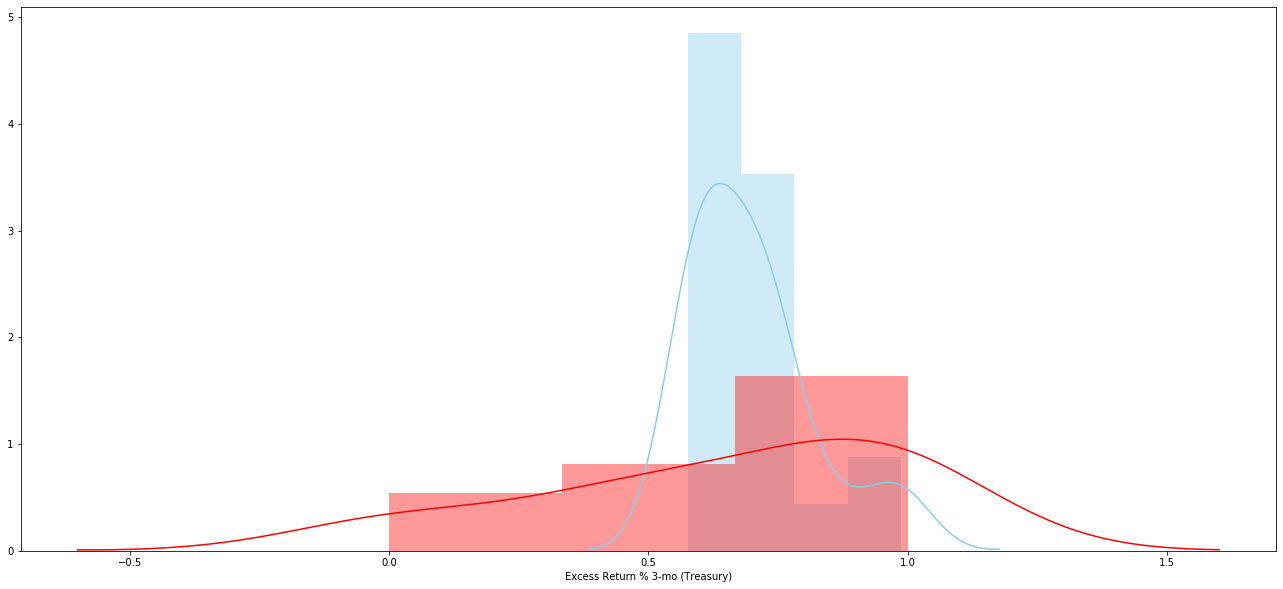

In [12]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [13]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  22.0  0.698072  0.119843  0.025551   0.644936   
 1  Excess Return % 3-mo (Agg)  22.0  0.492227  0.164370  0.035044   0.419349   
 2                    combined  44.0  0.595149  0.176205  0.026564   0.541578   
 
    Interval  
 0  0.751207  
 1  0.565104  
 2  0.648720  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =    0.2058
 1                             Degrees of freedom =   42.0000
 2                                              t =    4.7463
 3                          Two side test p value =    0.0000
 4                         Difference < 0 p value =    1.0000
 5                         Difference > 0 p value =    0.0000
 6                                      Cohen's d =    1.4311
 7                                      Hedge's g =    1.4054
 8                                  Glass's delta =    

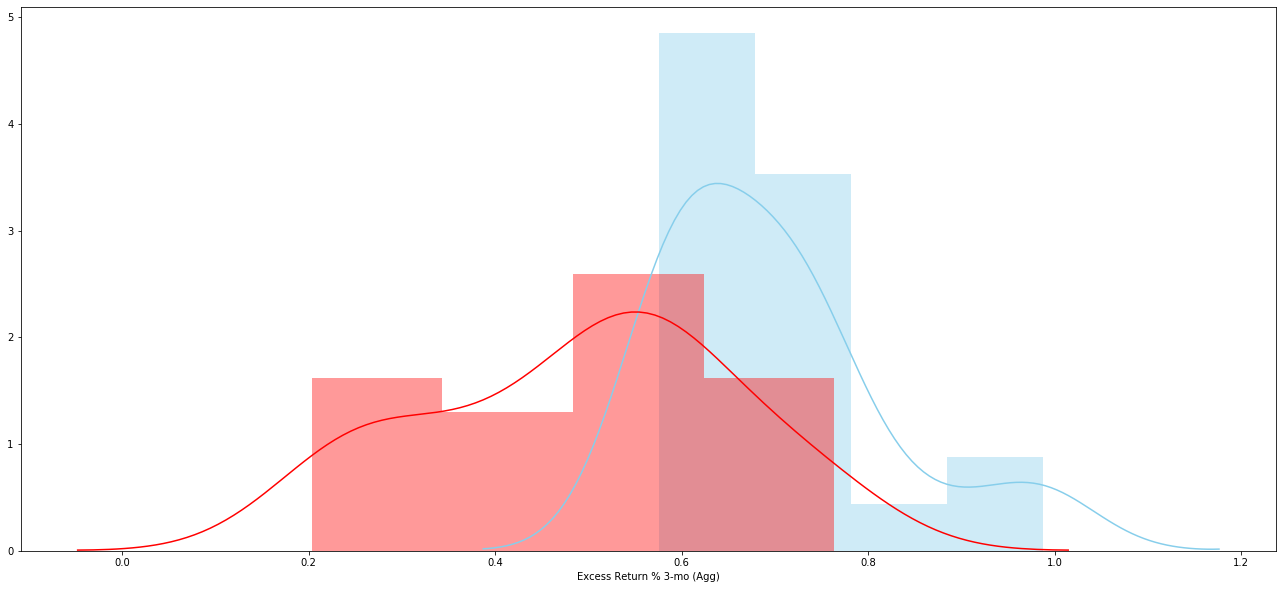

In [14]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [15]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  22.0  0.698072  0.119843  0.025551   
 1  Excess Return % 6-mo (Treasury)  22.0  0.647215  0.307728  0.065608   
 2                         combined  44.0  0.672643  0.232213  0.035007   
 
    95% Conf.  Interval  
 0   0.644936  0.751207  
 1   0.510776  0.783654  
 2   0.602044  0.743243  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...   0.0509
 1                              Degrees of freedom =   42.0000
 2                                               t =    0.7223
 3                           Two side test p value =    0.4741
 4                          Difference < 0 p value =    0.7629
 5                          Difference > 0 p value =    0.2371
 6                                       Cohen's d =    0.2178
 7                                       Hedge's g =    0.2139
 8                        

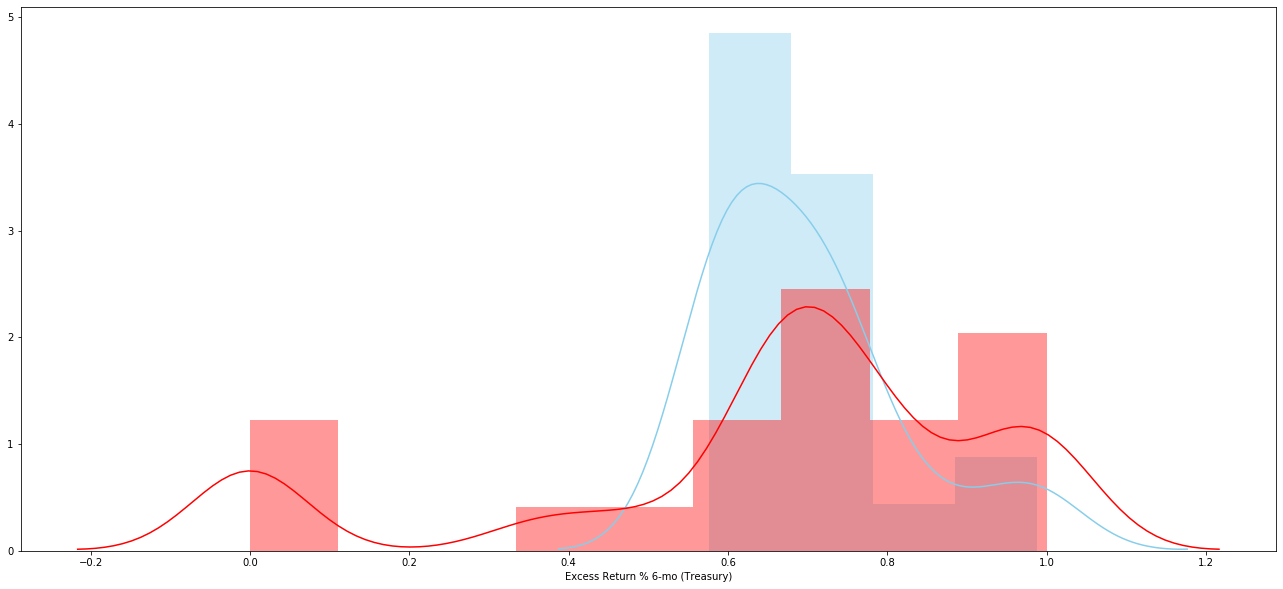

In [16]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [17]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  22.0  0.698072  0.119843  0.025551   0.644936   
 1  Excess Return % 6-mo (Agg)  22.0  0.477477  0.199906  0.042620   0.388843   
 2                    combined  44.0  0.587774  0.197431  0.029764   0.527750   
 
    Interval  
 0  0.751207  
 1  0.566110  
 2  0.647799  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =    0.2206
 1                             Degrees of freedom =   42.0000
 2                                              t =    4.4392
 3                          Two side test p value =    0.0001
 4                         Difference < 0 p value =    1.0000
 5                         Difference > 0 p value =    0.0000
 6                                      Cohen's d =    1.3385
 7                                      Hedge's g =    1.3144
 8                                  Glass's delta =    

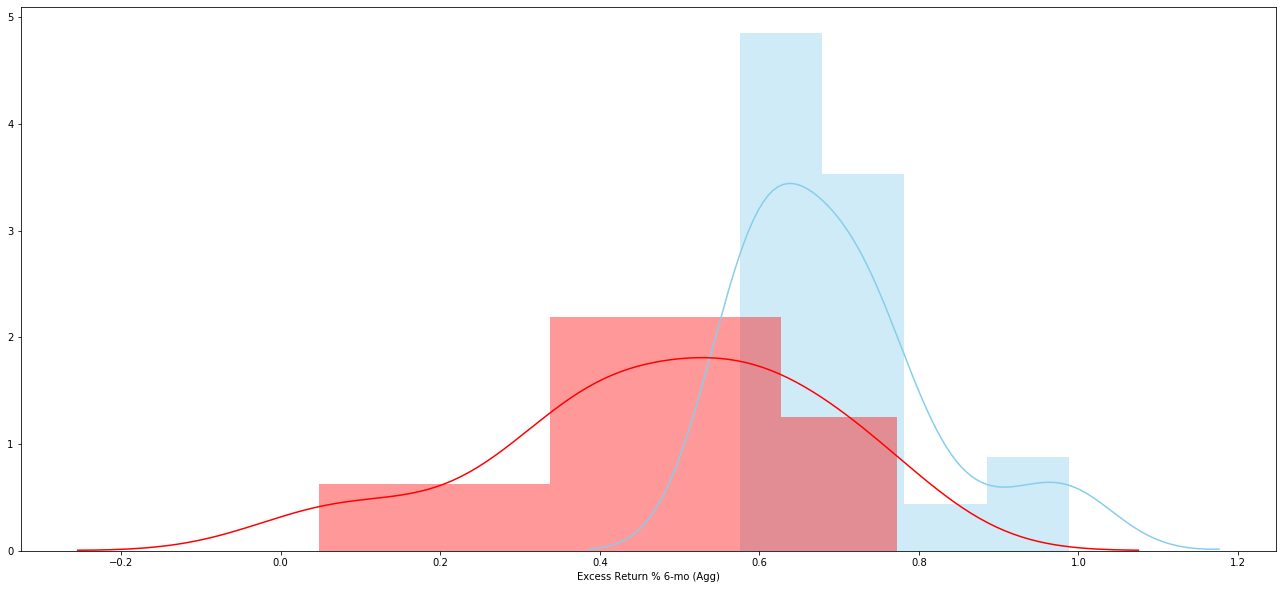

In [18]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [19]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  22.0  0.698072  0.119843  0.025551   
 1  Excess Return % 9-mo (Treasury)  22.0  0.638654  0.310496  0.066198   
 2                         combined  44.0  0.668363  0.234521  0.035355   
 
    95% Conf.  Interval  
 0   0.644936  0.751207  
 1   0.500988  0.776320  
 2   0.597062  0.739664  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...   0.0594
 1                              Degrees of freedom =   42.0000
 2                                               t =    0.8374
 3                           Two side test p value =    0.4071
 4                          Difference < 0 p value =    0.7964
 5                          Difference > 0 p value =    0.2036
 6                                       Cohen's d =    0.2525
 7                                       Hedge's g =    0.2479
 8                        

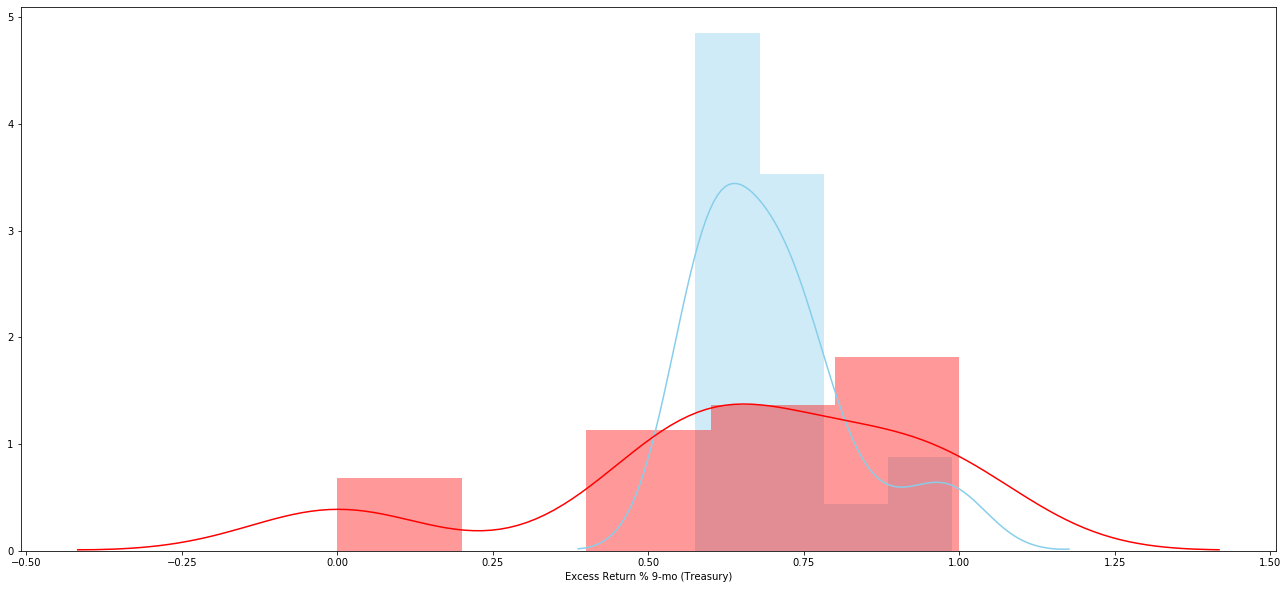

In [20]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [21]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  22.0  0.698072  0.119843  0.025551   0.644936   
 1  Excess Return % 9-mo (Agg)  22.0  0.466414  0.223041  0.047553   0.367523   
 2                    combined  44.0  0.582243  0.212221  0.031994   0.517722   
 
    Interval  
 0  0.751207  
 1  0.565305  
 2  0.646764  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =    0.2317
 1                             Degrees of freedom =   42.0000
 2                                              t =    4.2914
 3                          Two side test p value =    0.0001
 4                         Difference < 0 p value =    0.9999
 5                         Difference > 0 p value =    0.0001
 6                                      Cohen's d =    1.2939
 7                                      Hedge's g =    1.2707
 8                                  Glass's delta =    

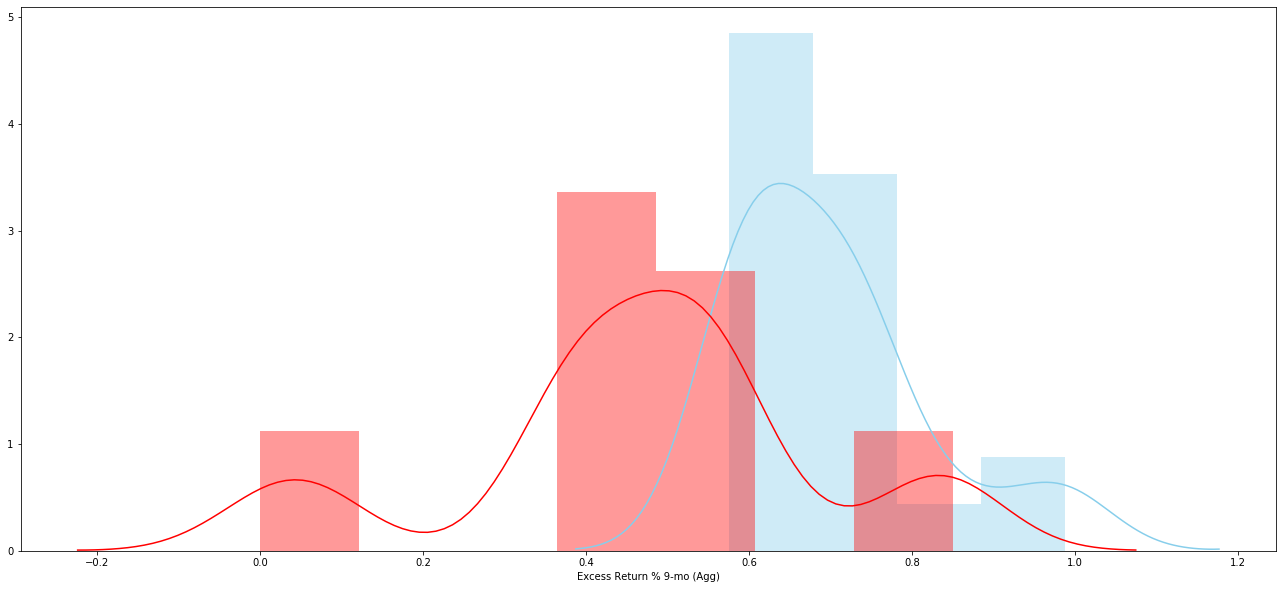

In [22]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [23]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  22.0  0.698072  0.119843  0.025551   
 1  Excess Return % 12-mo (Treasury)  22.0  0.644762  0.320228  0.068273   
 2                          combined  44.0  0.671417  0.240462  0.036251   
 
    95% Conf.  Interval  
 0   0.644936  0.751207  
 1   0.502780  0.786743  
 2   0.598310  0.744524  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Treas...   0.0533
 1                              Degrees of freedom =   42.0000
 2                                               t =    0.7313
 3                           Two side test p value =    0.4687
 4                          Difference < 0 p value =    0.7657
 5                          Difference > 0 p value =    0.2343
 6                                       Cohen's d =    0.2205
 7                                       Hedge's g =    0.2165
 8                    

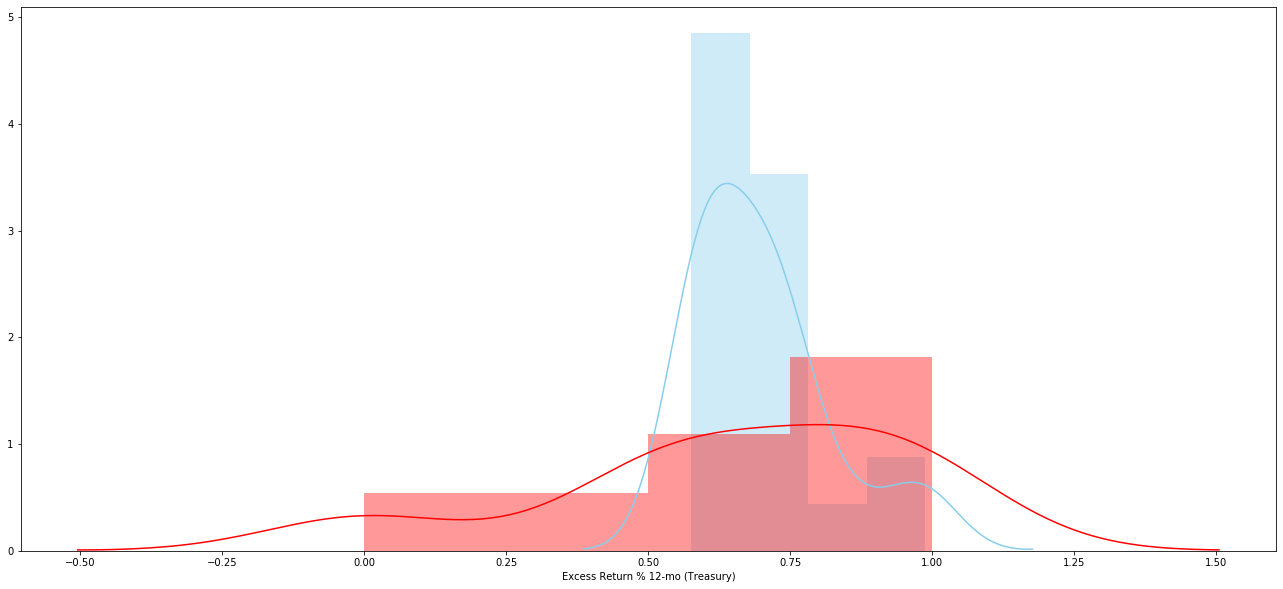

In [24]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [25]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  22.0  0.698072  0.119843  0.025551   0.644936   
 1  Excess Return % 12-mo (Agg)  22.0  0.456021  0.235484  0.050205   0.351613   
 2                     combined  44.0  0.577046  0.221548  0.033400   0.509690   
 
    Interval  
 0  0.751207  
 1  0.560429  
 2  0.644403  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =    0.2421
 1                              Degrees of freedom =   42.0000
 2                                               t =    4.2968
 3                           Two side test p value =    0.0001
 4                          Difference < 0 p value =    0.9999
 5                          Difference > 0 p value =    0.0001
 6                                       Cohen's d =    1.2955
 7                                       Hedge's g =    1.2723
 8                                   Glass

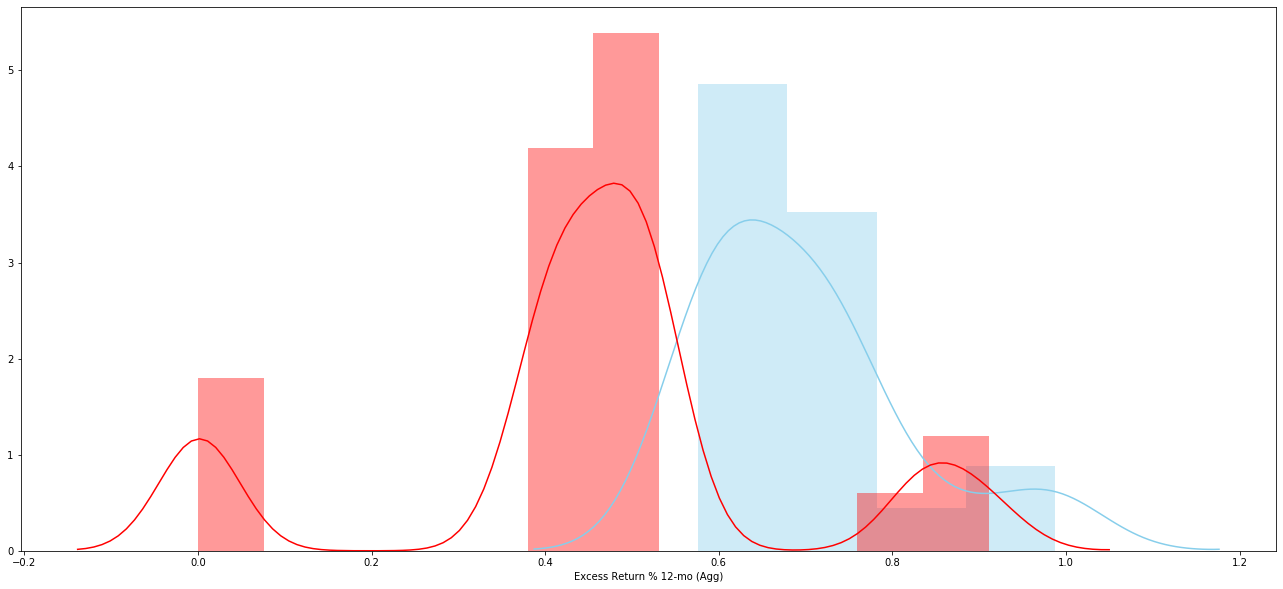

In [26]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [27]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  22.0  0.698072  0.119843  0.025551   
 1  Excess Return % 24-mo (Treasury)  22.0  0.549672  0.263979  0.056280   
 2                          combined  44.0  0.623872  0.216055  0.032572   
 
    95% Conf.  Interval  
 0   0.644936  0.751207  
 1   0.432631  0.666714  
 2   0.558185  0.689559  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Treas...   0.1484
 1                              Degrees of freedom =   42.0000
 2                                               t =    2.4009
 3                           Two side test p value =    0.0209
 4                          Difference < 0 p value =    0.9896
 5                          Difference > 0 p value =    0.0104
 6                                       Cohen's d =    0.7239
 7                                       Hedge's g =    0.7109
 8                    

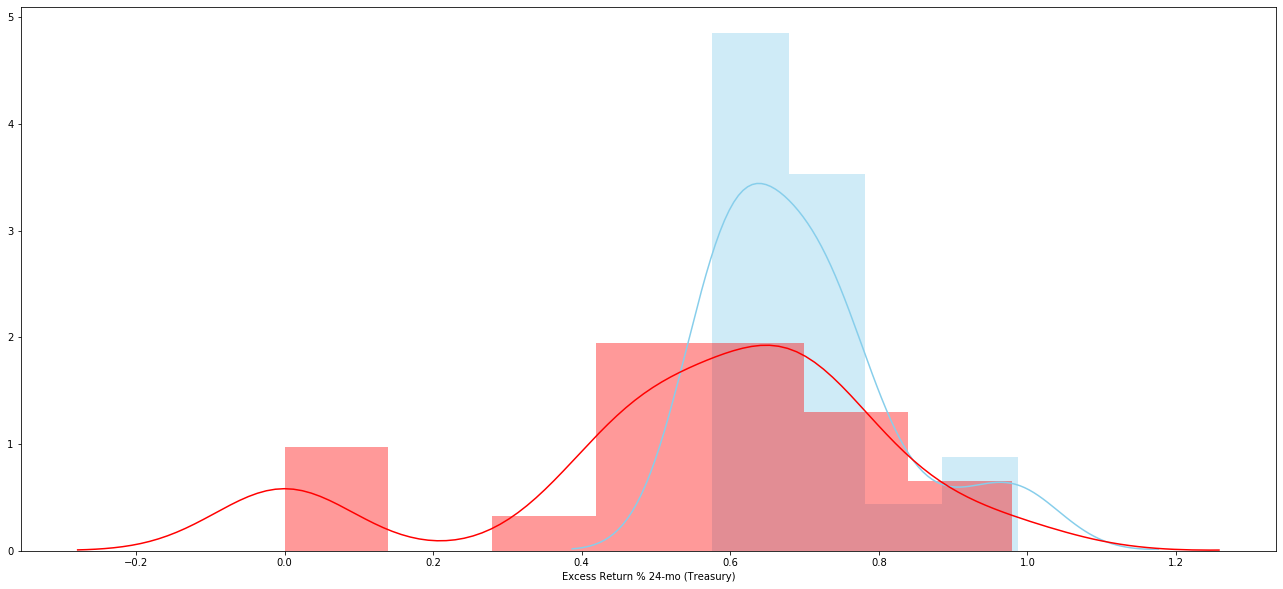

In [28]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [29]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  22.0  0.698072  0.119843  0.025551   0.644936   
 1  Excess Return % 24-mo (Agg)  22.0  0.371009  0.232465  0.049562   0.267939   
 2                     combined  44.0  0.534540  0.246516  0.037164   0.459592   
 
    Interval  
 0  0.751207  
 1  0.474078  
 2  0.609488  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =    0.3271
 1                              Degrees of freedom =   42.0000
 2                                               t =    5.8655
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.7685
 7                                       Hedge's g =    1.7368
 8                                   Glass

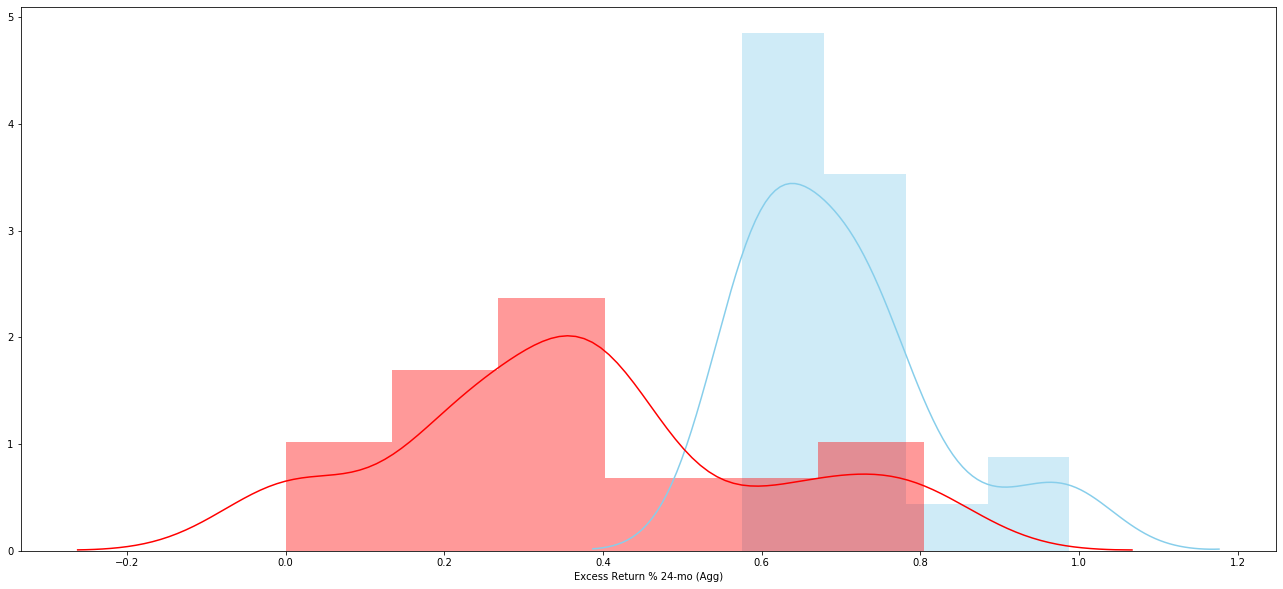

In [30]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [31]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  22.0  0.698072  0.119843  0.025551   
 1  Excess Return % 36-mo (Treasury)  22.0  0.649909  0.262739  0.056016   
 2                          combined  44.0  0.673990  0.203275  0.030645   
 
    95% Conf.  Interval  
 0   0.644936  0.751207  
 1   0.533417  0.766401  
 2   0.612189  0.735792  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Treas...   0.0482
 1                              Degrees of freedom =   42.0000
 2                                               t =    0.7823
 3                           Two side test p value =    0.4384
 4                          Difference < 0 p value =    0.7808
 5                          Difference > 0 p value =    0.2192
 6                                       Cohen's d =    0.2359
 7                                       Hedge's g =    0.2316
 8                    

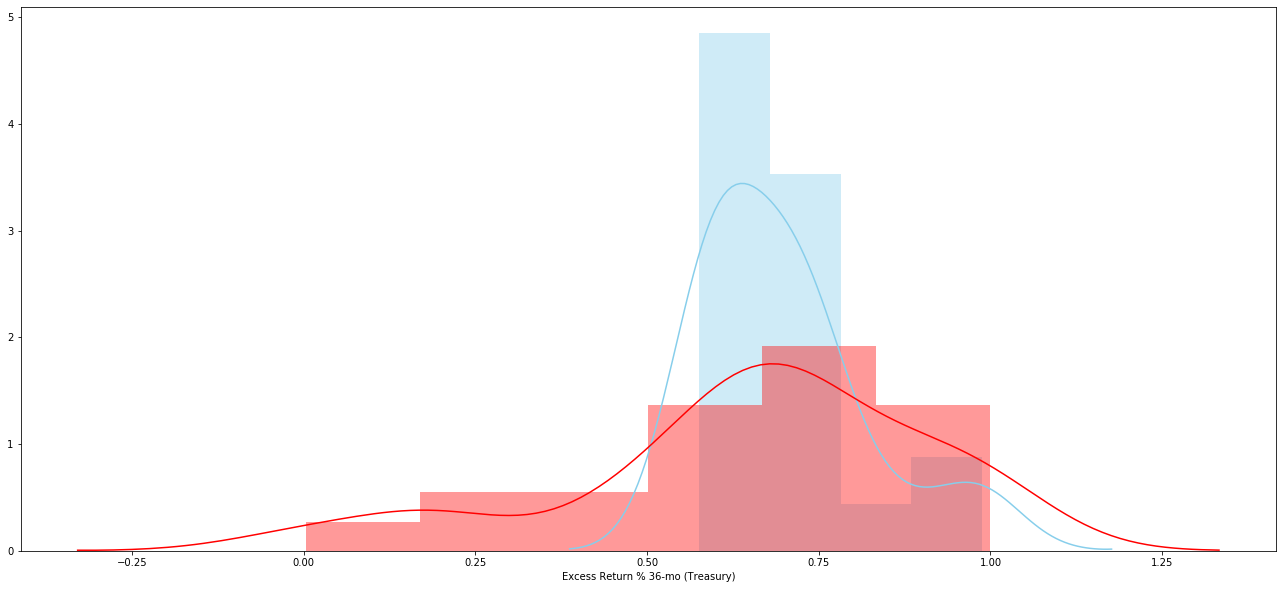

In [32]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [33]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  22.0  0.698072  0.119843  0.025551   0.644936   
 1  Excess Return % 36-mo (Agg)  22.0  0.425513  0.220088  0.046923   0.327932   
 2                     combined  44.0  0.561793  0.222877  0.033600   0.494032   
 
    Interval  
 0  0.751207  
 1  0.523095  
 2  0.629553  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =    0.2726
 1                              Degrees of freedom =   42.0000
 2                                               t =    5.1014
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.5381
 7                                       Hedge's g =    1.5105
 8                                   Glass

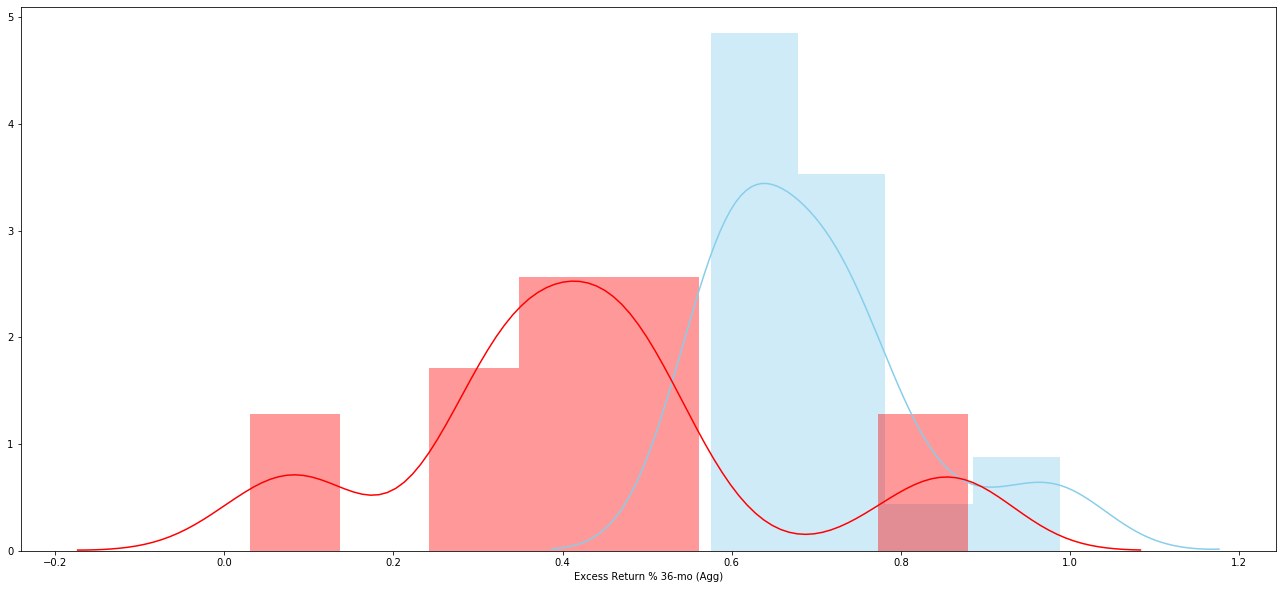

In [34]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")

# Now lets run the same t-test but with High spreads to all returns

In [35]:
df1 = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_HY.csv') 

In [36]:
df1.describe()

,OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg)
count,279.000000,279.000000,279.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000
mean,0.351159,0.492857,0.494827,0.490379,0.489711,0.495175,0.499683,0.507613,0.505828,0.497147,0.499497,0.507319,0.498248,0.493073,0.484863
std,0.247503,0.237344,0.233785,0.235178,0.219736,0.223090,0.225057,0.219753,0.213179,0.207683,0.201386,0.215835,0.219765,0.208462,0.217124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.155043,0.371940,0.372569,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000
50%,0.289734,0.500462,0.504350,0.512762,0.514750,0.512260,0.523454,0.533540,0.522281,0.512685,0.503557,0.541286,0.537844,0.517038,0.523230
75%,0.489075,0.624134,0.622223,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
des, res = researchpy.ttest(df['OAS'], 
df1['Excess Return % 3-mo (Treasury)']) # notice we are using the High Spread Data for OAS

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   22.0  0.698072  0.119843  0.025551   
 1  Excess Return % 3-mo (Treasury)  278.0  0.490379  0.235178  0.014105   
 2                         combined  300.0  0.505610  0.234924  0.013563   
 
    95% Conf.  Interval  
 0   0.644936  0.751207  
 1   0.462612  0.518146  
 2   0.478918  0.532302  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.2077
 1                              Degrees of freedom =   298.0000
 2                                               t =     4.0957
 3                           Two side test p value =     0.0001
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.9071
 7                                       Hedge's g =     0.9048
 8           

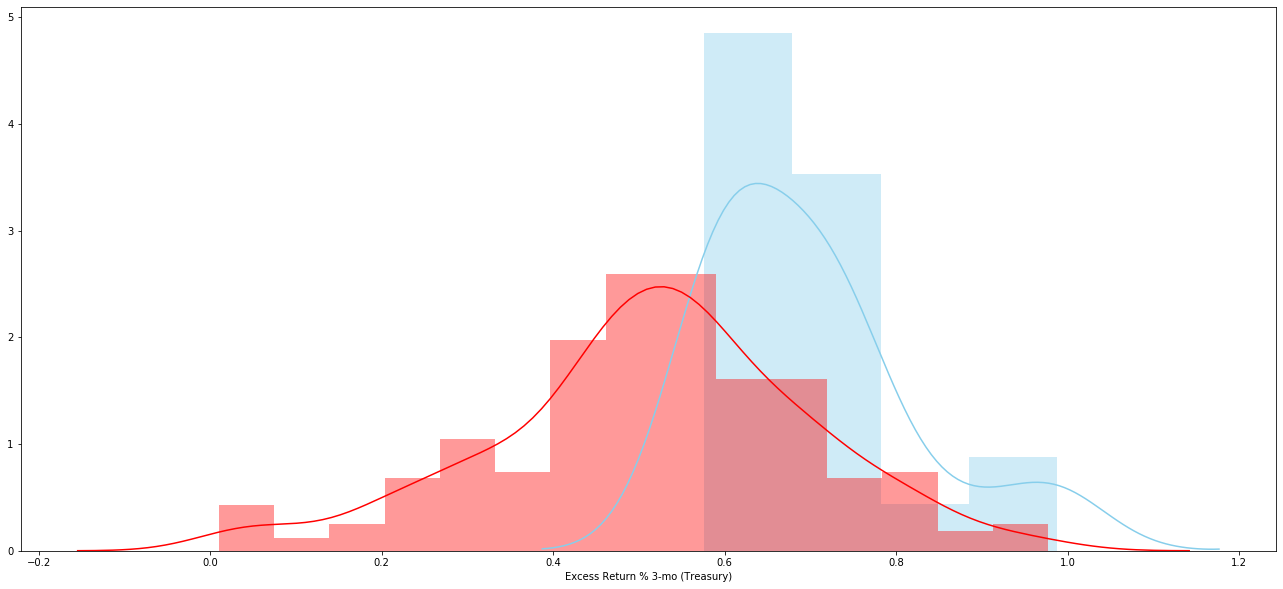

In [38]:
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [39]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   22.0  0.698072  0.119843  0.025551   0.644936   
 1  Excess Return % 3-mo (Agg)  278.0  0.489711  0.219736  0.013179   0.463767   
 2                    combined  300.0  0.504990  0.220681  0.012741   0.479917   
 
    Interval  
 0  0.751207  
 1  0.515654  
 2  0.530064  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.2084
 1                             Degrees of freedom =   298.0000
 2                                              t =     4.3915
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     0.9726
 7                                      Hedge's g =     0.9702
 8                                  Glass'

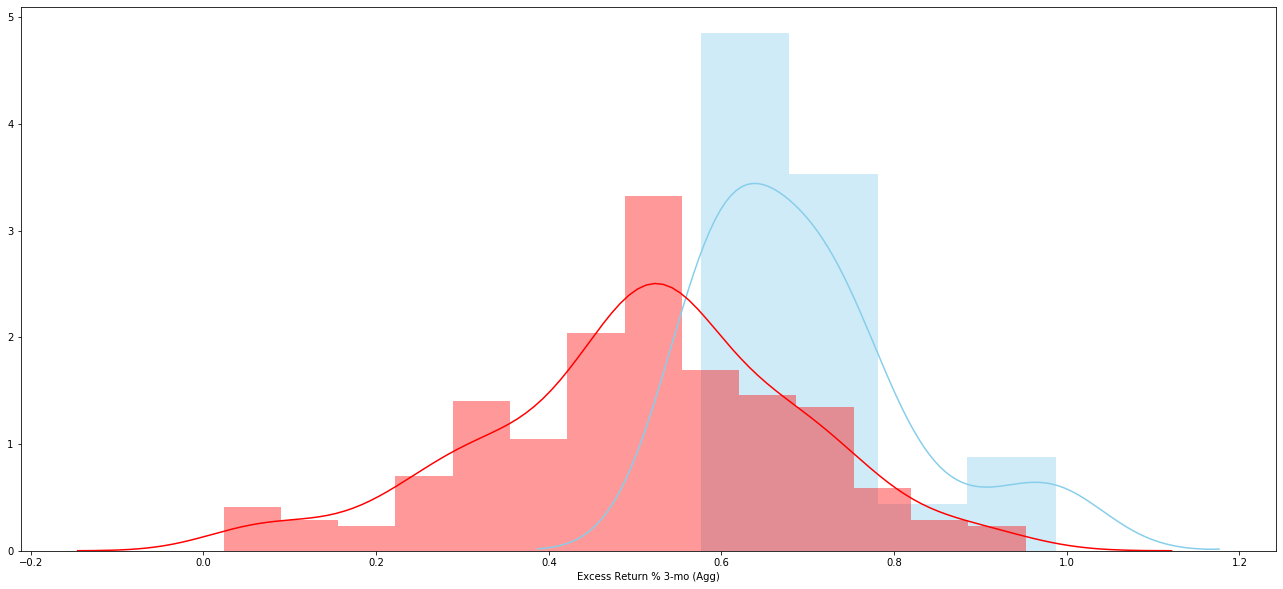

In [40]:
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [41]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   22.0  0.698072  0.119843  0.025551   
 1  Excess Return % 6-mo (Treasury)  275.0  0.495175  0.223090  0.013453   
 2                         combined  297.0  0.510205  0.223433  0.012965   
 
    95% Conf.  Interval  
 0   0.644936  0.751207  
 1   0.468691  0.521659  
 2   0.484690  0.535720  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.2029
 1                              Degrees of freedom =   295.0000
 2                                               t =     4.2129
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.9334
 7                                       Hedge's g =     0.9310
 8           

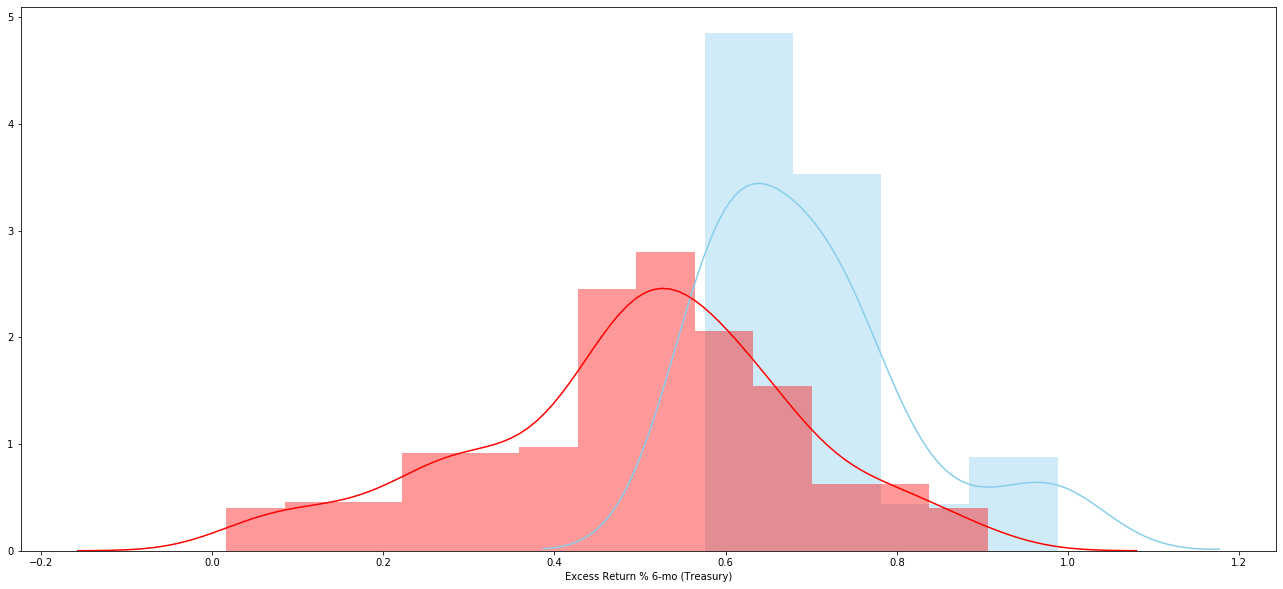

In [42]:
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [43]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   22.0  0.698072  0.119843  0.025551   0.644936   
 1  Excess Return % 6-mo (Agg)  275.0  0.499683  0.225057  0.013571   0.472965   
 2                    combined  297.0  0.514378  0.224975  0.013054   0.488687   
 
    Interval  
 0  0.751207  
 1  0.526400  
 2  0.540069  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.1984
 1                             Degrees of freedom =   295.0000
 2                                              t =     4.0841
 3                          Two side test p value =     0.0001
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     0.9049
 7                                      Hedge's g =     0.9026
 8                                  Glass'

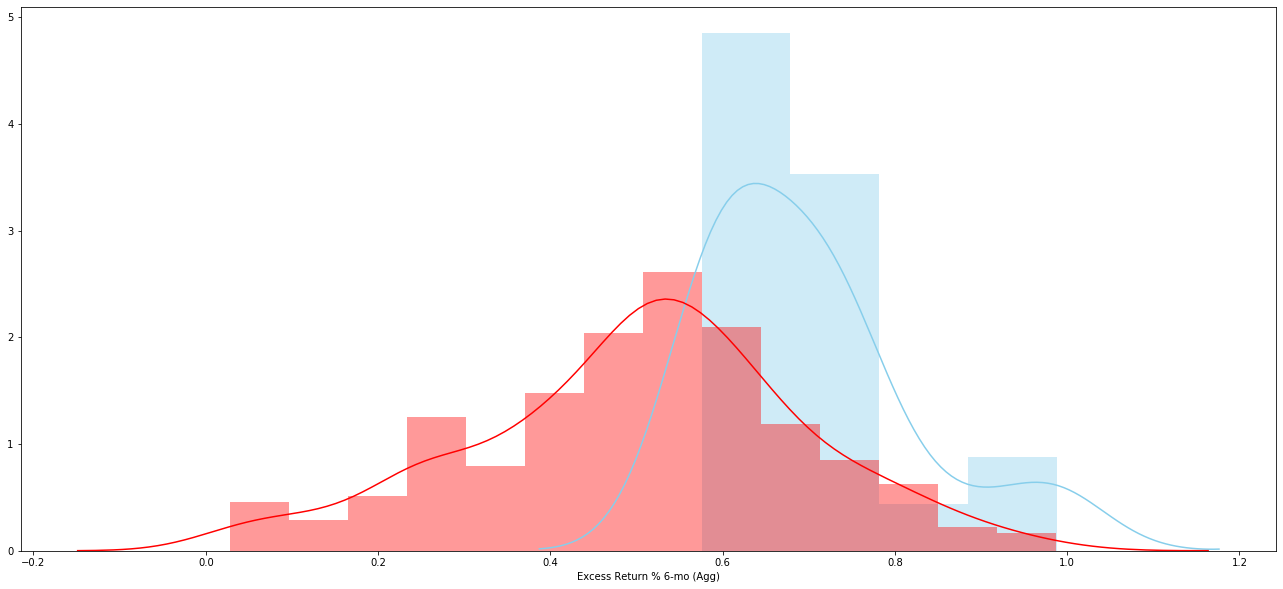

In [44]:
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [45]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   22.0  0.698072  0.119843  0.025551   
 1  Excess Return % 9-mo (Treasury)  272.0  0.507613  0.219753  0.013325   
 2                         combined  294.0  0.521865  0.219579  0.012806   
 
    95% Conf.  Interval  
 0   0.644936  0.751207  
 1   0.481380  0.533846  
 2   0.496661  0.547069  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.1905
 1                              Degrees of freedom =   292.0000
 2                                               t =     4.0128
 3                           Two side test p value =     0.0001
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.8895
 7                                       Hedge's g =     0.8872
 8           

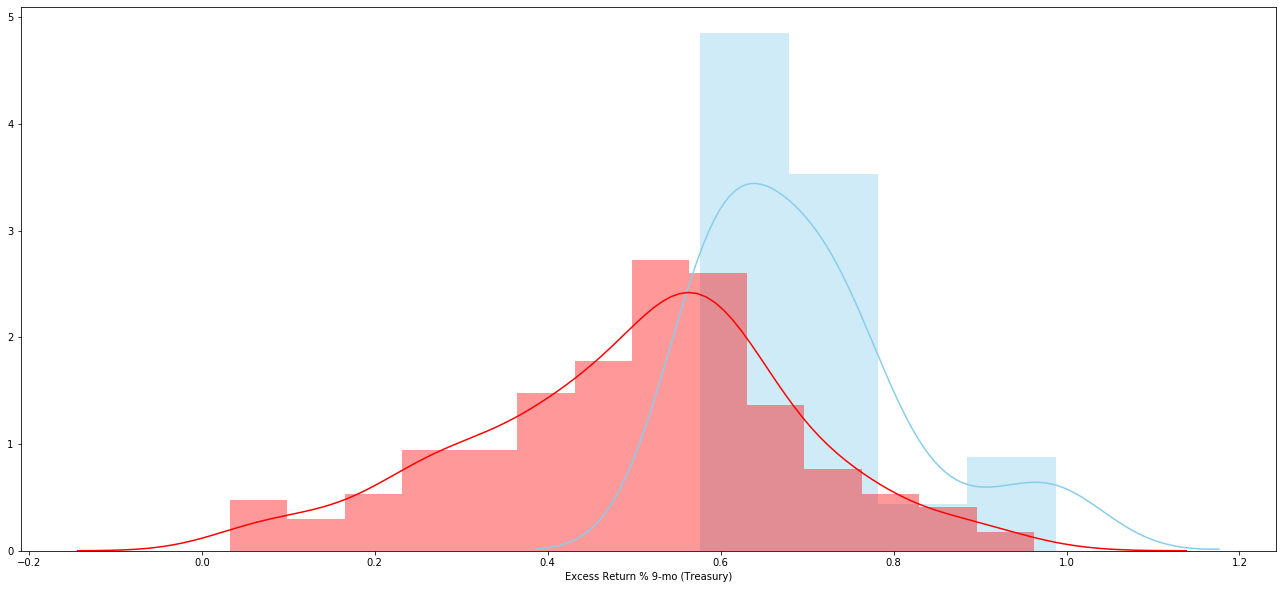

In [46]:
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [47]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   22.0  0.698072  0.119843  0.025551   0.644936   
 1  Excess Return % 9-mo (Agg)  272.0  0.505828  0.213179  0.012926   0.480380   
 2                    combined  294.0  0.520214  0.213611  0.012458   0.495695   
 
    Interval  
 0  0.751207  
 1  0.531276  
 2  0.544732  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.1922
 1                             Degrees of freedom =   292.0000
 2                                              t =     4.1724
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     0.9248
 7                                      Hedge's g =     0.9225
 8                                  Glass'

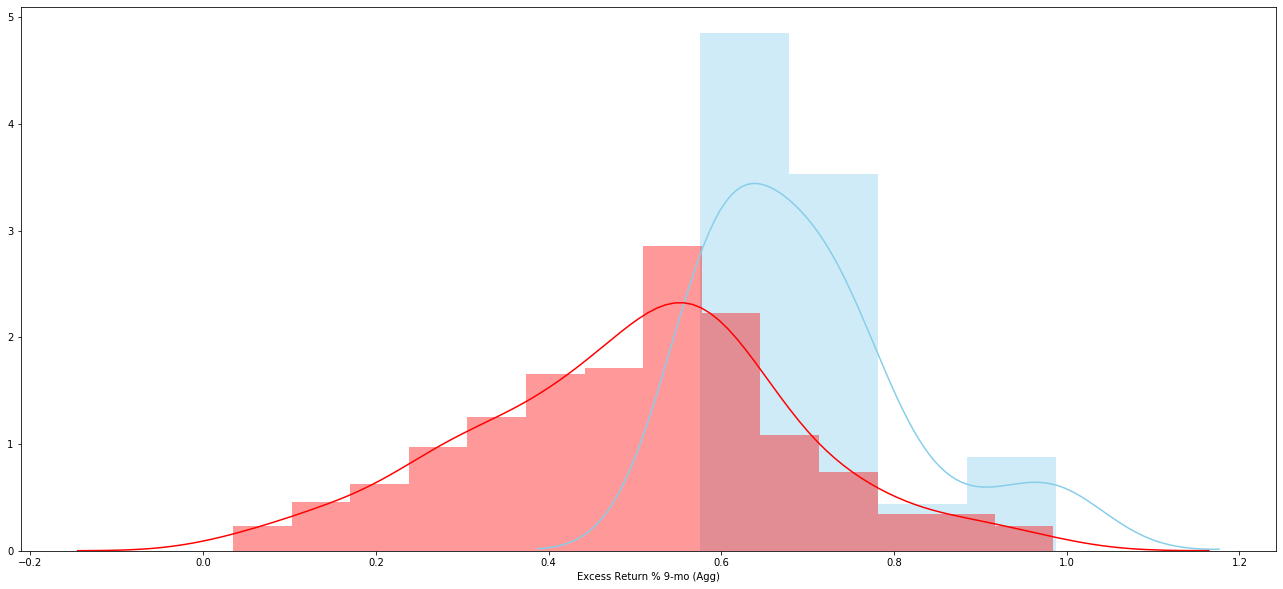

In [48]:
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [49]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   22.0  0.698072  0.119843  0.025551   
 1  Excess Return % 12-mo (Treasury)  269.0  0.497147  0.207683  0.012663   
 2                          combined  291.0  0.512337  0.209120  0.012259   
 
    95% Conf.  Interval  
 0   0.644936  0.751207  
 1   0.472216  0.522078  
 2   0.488210  0.536465  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.2009
 1                              Degrees of freedom =   289.0000
 2                                               t =     4.4726
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.9918
 7                                       Hedge's g =     0.9892
 8       

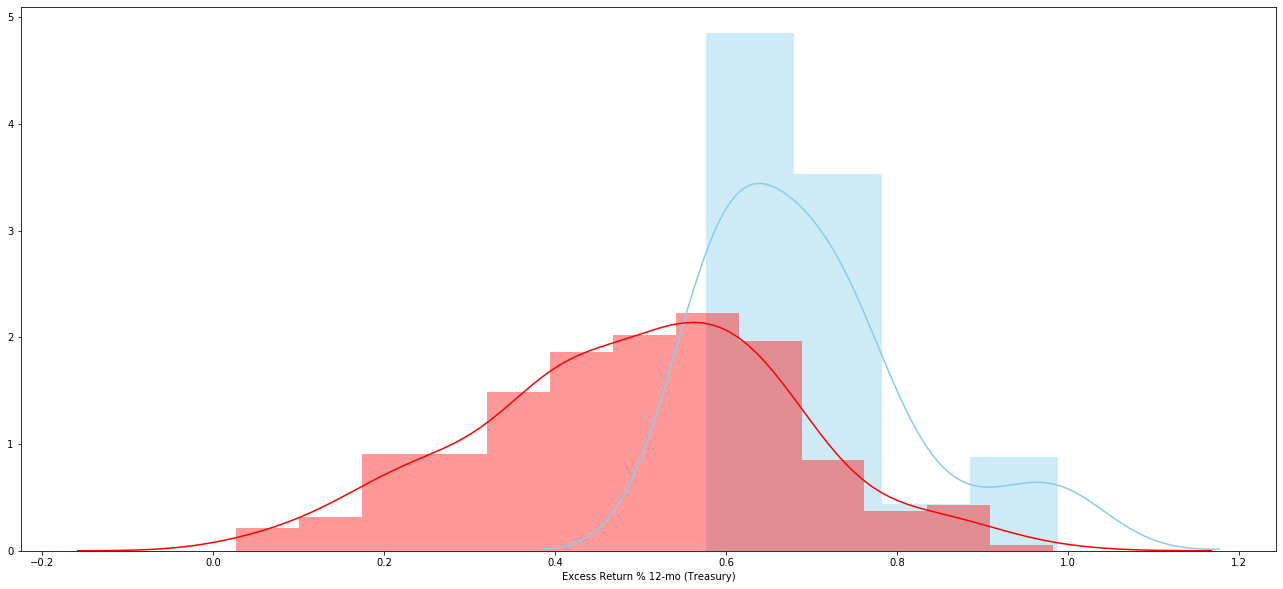

In [50]:
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [51]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   22.0  0.698072  0.119843  0.025551   
 1  Excess Return % 12-mo (Agg)  269.0  0.499497  0.201386  0.012279   
 2                     combined  291.0  0.514509  0.203187  0.011911   
 
    95% Conf.  Interval  
 0   0.644936  0.751207  
 1   0.475322  0.523672  
 2   0.491066  0.537952  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.1986
 1                              Degrees of freedom =   289.0000
 2                                               t =     4.5549
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.0100
 7                                       Hedge's g =     1.0074
 8                           

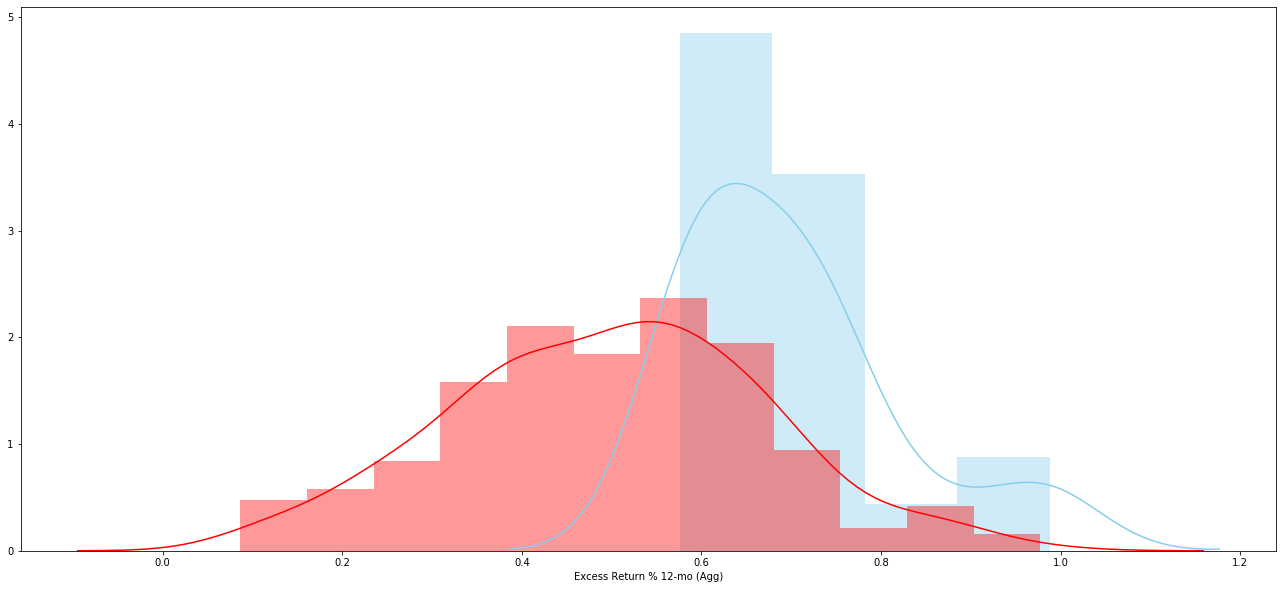

In [52]:
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [53]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   22.0  0.698072  0.119843  0.025551   
 1  Excess Return % 24-mo (Treasury)  257.0  0.507319  0.215835  0.013463   
 2                          combined  279.0  0.522361  0.215953  0.012929   
 
    95% Conf.  Interval  
 0   0.644936  0.751207  
 1   0.480806  0.533832  
 2   0.496910  0.547811  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.1908
 1                              Degrees of freedom =   277.0000
 2                                               t =     4.0871
 3                           Two side test p value =     0.0001
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.9079
 7                                       Hedge's g =     0.9055
 8       

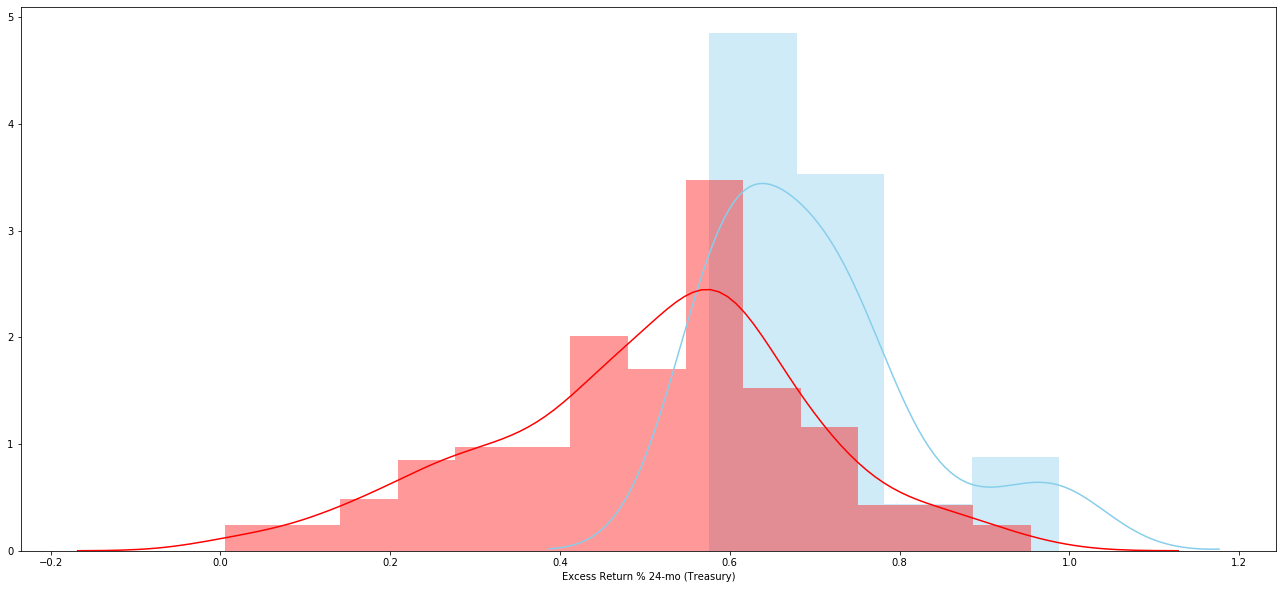

In [54]:
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [55]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   22.0  0.698072  0.119843  0.025551   
 1  Excess Return % 24-mo (Agg)  257.0  0.498248  0.219765  0.013709   
 2                     combined  279.0  0.514005  0.220160  0.013181   
 
    95% Conf.  Interval  
 0   0.644936  0.751207  
 1   0.471252  0.525244  
 2   0.488058  0.539951  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.1998
 1                              Degrees of freedom =   277.0000
 2                                               t =     4.2068
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.9345
 7                                       Hedge's g =     0.9320
 8                           

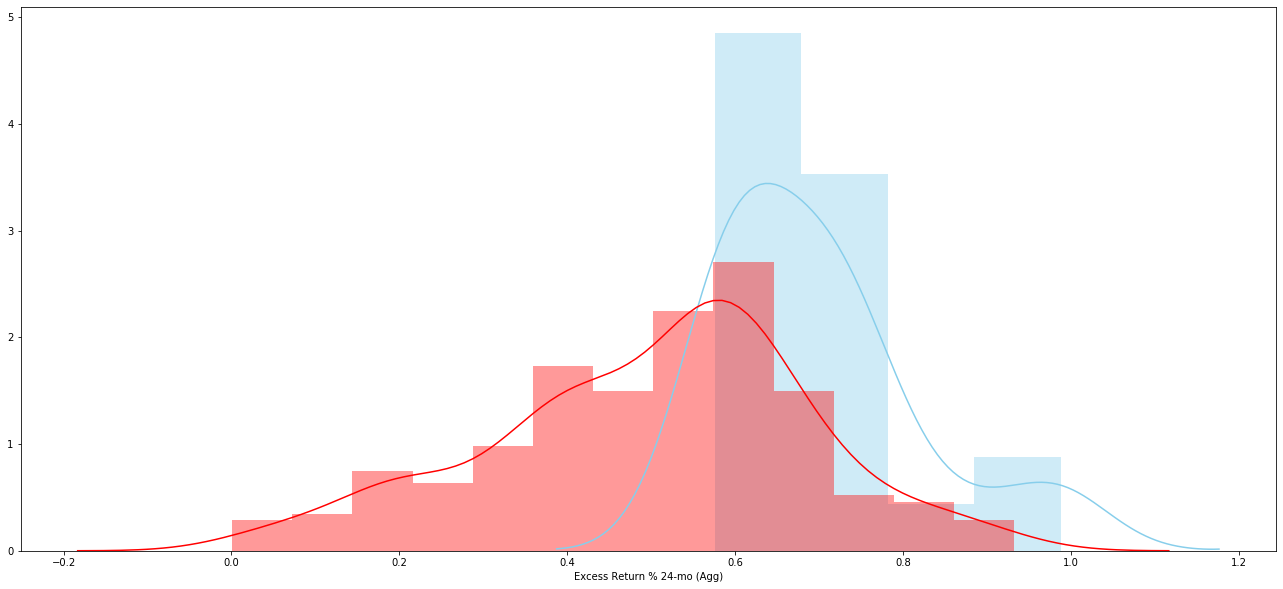

In [56]:
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [57]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   22.0  0.698072  0.119843  0.025551   
 1  Excess Return % 36-mo (Treasury)  245.0  0.493073  0.208462  0.013318   
 2                          combined  267.0  0.509964  0.210203  0.012864   
 
    95% Conf.  Interval  
 0   0.644936  0.751207  
 1   0.466840  0.519306  
 2   0.484635  0.535293  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.2050
 1                              Degrees of freedom =   265.0000
 2                                               t =     4.5405
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.0106
 7                                       Hedge's g =     1.0077
 8       

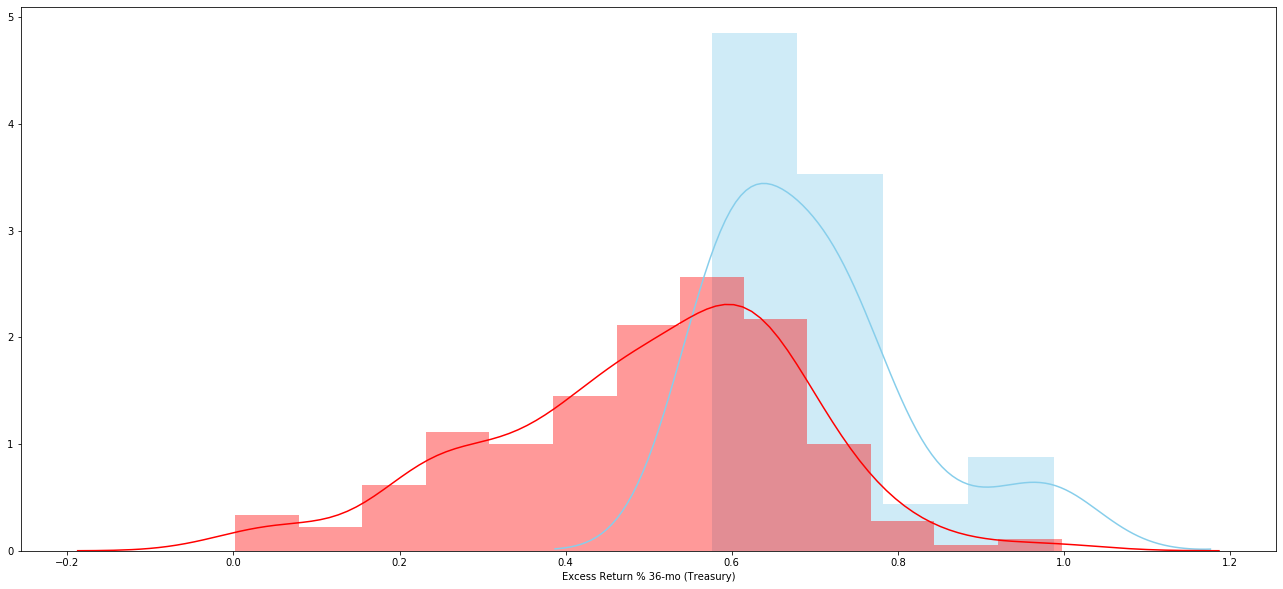

In [58]:
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [59]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   22.0  0.698072  0.119843  0.025551   
 1  Excess Return % 36-mo (Agg)  245.0  0.484863  0.217124  0.013872   
 2                     combined  267.0  0.502431  0.218695  0.013384   
 
    95% Conf.  Interval  
 0   0.644936  0.751207  
 1   0.457540  0.512186  
 2   0.476079  0.528783  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.2132
 1                              Degrees of freedom =   265.0000
 2                                               t =     4.5388
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.0102
 7                                       Hedge's g =     1.0073
 8                           

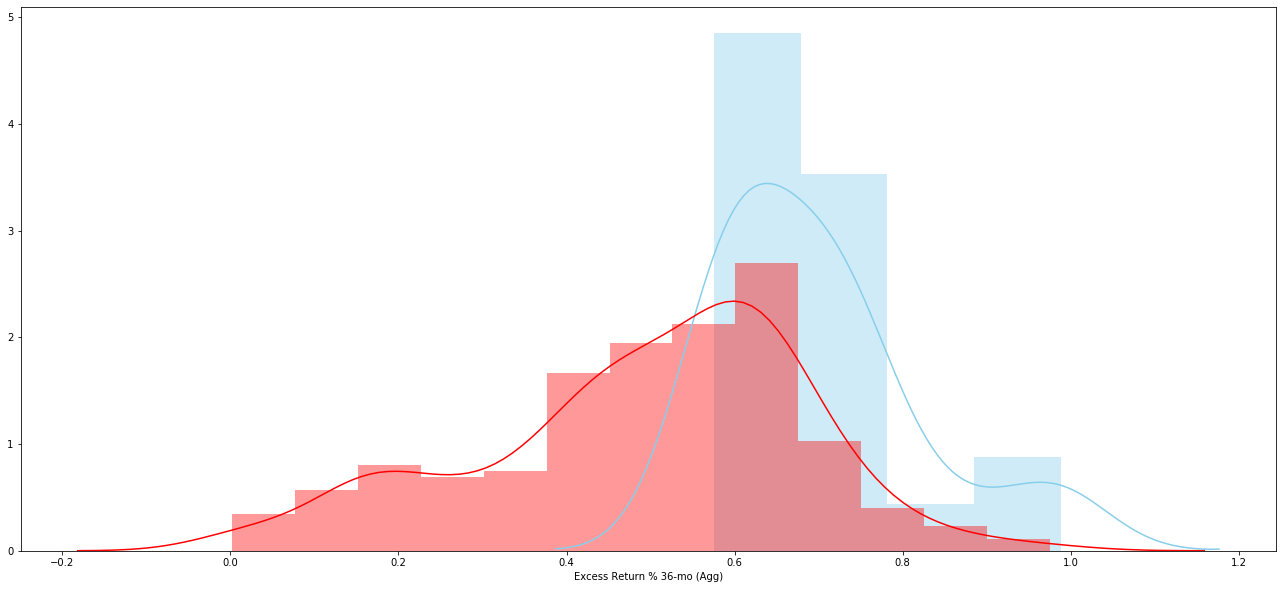

In [60]:
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")